In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

In [ ]:
start_date = "2006-01-01"
end_date = "2010-12-31"

In [ ]:
# Example sector-wise tickers
sectors = {
    'Financials': ['JPM', 'BAC', 'GS'],
    'Technology': ['AAPL', 'MSFT', 'IBM'],
    'Energy': ['XOM', 'CVX', 'BP'],
    'Healthcare': ['JNJ', 'PFE', 'MRK']
}

In [1]:
def get_data(tickers):
    df = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

    # Extract "Adj Close" for each ticker
    adj_close = pd.DataFrame()
    for ticker in tickers:
        adj_close[ticker] = df[ticker]['Adj Close']
    return adj_close

In [ ]:
sector_data = {sector: get_data(tickers) for sector, tickers in sectors.items()}

print(sector_data)


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


{'Financials':                   JPM        BAC          GS
Date                                        
2006-01-03  23.977793  30.991043   94.820457
2006-01-04  23.839409  30.661907   93.510803
2006-01-05  23.911608  30.701408   93.473999
2006-01-06  24.080082  30.655329   94.798386
2006-01-09  24.471184  30.675076   95.938873
...               ...        ...         ...
2010-12-23  28.281919  10.269104  129.025818
2010-12-27  28.678452  10.434228  130.742554
2010-12-28  28.638136  10.489273  130.249908
2010-12-29  28.470110  10.465681  129.048874
2010-12-30  28.382730  10.442094  129.056625

[1258 rows x 3 columns], 'Technology':                 AAPL       MSFT        IBM
Date                                      
2006-01-03  2.246551  18.780914  42.858009
2006-01-04  2.253162  18.871874  42.800533
2006-01-05  2.235431  18.885868  43.087807
2006-01-06  2.293134  18.829887  44.367359
2006-01-09  2.285621  18.794905  43.730198
...              ...        ...        ...
2010-12-23  9.72

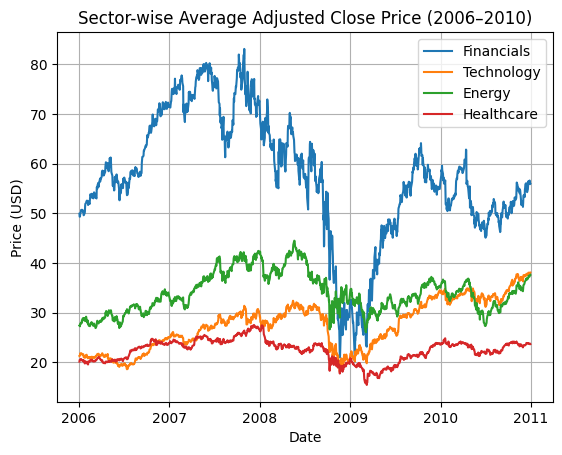

In [ ]:
for sector, df in sector_data.items():
    sector_avg = df.mean(axis=1)
    plt.plot(sector_avg, label=sector)

plt.legend()
plt.title("Sector-wise Average Adjusted Close Price (2006–2010)")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.grid(True)
plt.show()


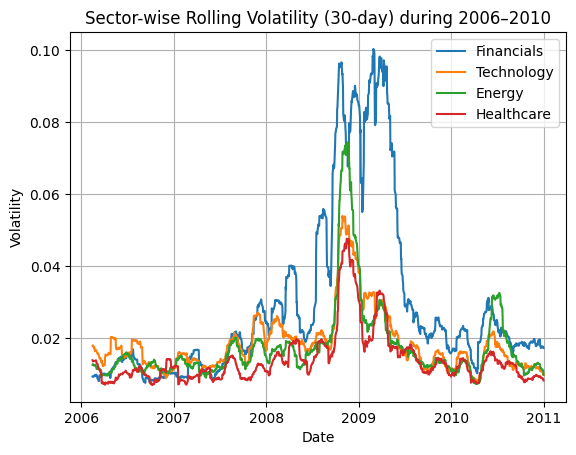

In [ ]:
sector_volatility = {}

for sector, df in sector_data.items():
    daily_returns = df.pct_change().dropna()
    rolling_volatility = daily_returns.rolling(window=30).std().mean(axis=1)
    sector_volatility[sector] = rolling_volatility

# Plot
for sector, vol in sector_volatility.items():
    plt.plot(vol, label=sector)

plt.legend()
plt.title("Sector-wise Rolling Volatility (30-day) during 2006–2010")
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.grid(True)
plt.show()


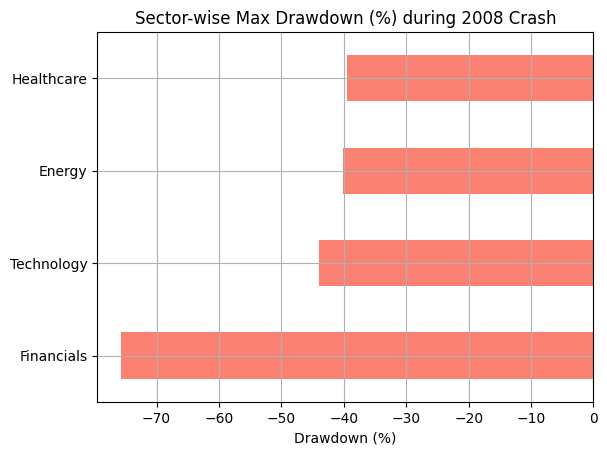

In [ ]:
crash_start = "2007-10-01"
crash_end = "2009-03-01"

drawdowns = {}

for sector, df in sector_data.items():
    sector_avg = df.mean(axis=1)
    crash_data = sector_avg[crash_start:crash_end]
    peak = crash_data.max()
    trough = crash_data.min()
    loss_pct = ((trough - peak) / peak) * 100
    drawdowns[sector] = loss_pct

# Visualize
drawdown_df = pd.DataFrame.from_dict(drawdowns, orient='index', columns=['Max Drawdown %']).sort_values(by='Max Drawdown %')
drawdown_df.plot(kind='barh', color='salmon', legend=False)
plt.title("Sector-wise Max Drawdown (%) during 2008 Crash")
plt.xlabel("Drawdown (%)")
plt.grid(True)
plt.show()


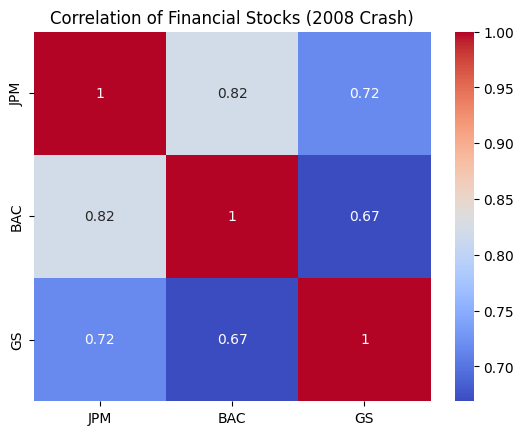

In [ ]:
# Financials example
returns = sector_data['Financials'].pct_change().dropna()
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Financial Stocks (2008 Crash)")
plt.show()
